# Prince Sharma : M.sc Data science ( University of Glasgow)
## StatsBomb Task
## prince.martinian@gmail.com

### Data Preprocessing

In [ ]:
pip install statsbomb


In [ ]:
pip install plotly

In [ ]:
import pandas as pd
import statsbomb as sb

In [ ]:
import glob
import json
path = r'D:\open-data-master\data\lineups' # use your path
all_files = glob.glob(path + "/*.json")

li = []

for filename in all_files:
    df = pd.read_json(filename)
    li.append(df)
df_lineup=pd.concat(li)    

In [ ]:
df_lineup.describe()

In [ ]:
df_lineup.info()

In [ ]:
comps = sb.Competitions().get_dataframe()

In [175]:
comps

,competition_id,season_id,country_name,competition_name,competition_gender,season_name,match_updated,match_available
0,16,4,Europe,Champions League,male,2018/2019,2020-07-29T05:00,2020-07-29T05:00
1,16,1,Europe,Champions League,male,2017/2018,2020-07-29T05:00,2020-07-29T05:00
2,16,2,Europe,Champions League,male,2016/2017,2020-08-26T12:33:15.869622,2020-07-29T05:00
3,16,27,Europe,Champions League,male,2015/2016,2020-08-26T12:33:15.869622,2020-07-29T05:00
4,16,26,Europe,Champions League,male,2014/2015,2020-08-26T12:33:15.869622,2020-07-29T05:00
5,16,25,Europe,Champions League,male,2013/2014,2020-08-26T12:33:15.869622,2020-07-29T05:00
6,16,24,Europe,Champions League,male,2012/2013,2020-08-26T12:33:15.869622,2020-07-29T05:00
7,16,23,Europe,Champions League,male,2011/2012,2020-08-26T12:33:15.869622,2020-07-29T05:00
8,16,22,Europe,Champions League,male,2010/2011,2020-07-29T05:00,2020-07-29T05:00
9,16,21,Europe,Champions League,male,2009/2010,2020-07-29T05:00,2020-07-29T05:00


In [79]:
comps.describe()



,competition_id,season_id
count,38.000000,38.000000
mean,18.236842,27.368421
std,13.439422,19.517727
min,2.000000,1.000000
25%,11.000000,21.000000
50%,16.000000,25.500000
75%,16.000000,39.000000
max,72.000000,90.000000


In [80]:
comps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   competition_id      38 non-null     int64 
 1   season_id           38 non-null     int64 
 2   country_name        38 non-null     object
 3   competition_name    38 non-null     object
 4   competition_gender  38 non-null     object
 5   season_name         38 non-null     object
 6   match_updated       38 non-null     object
 7   match_available     37 non-null     object
dtypes: int64(2), object(6)
memory usage: 2.5+ KB


### Selection of  La Liga ( Competition_id =11)  for this season and last two seasons

In [319]:
competition_id = 11
season_id = 4 # Season 2018/2019
old_laliga= sb.Matches(event_id=competition_id, season_id=season_id).get_dataframe()


In [350]:
old_laliga

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,Result,match_status,last_updated,metadata,match_week,competition_stage,stadium,referee,Home_Team,Away_Team
0,16157,2019-02-02,18:30:00.000,11,4,217,207,2,2,Draw,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",22,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 221, 'name': 'Alberto Undiano', 'countr...",Barcelona,Valencia
1,16136,2019-01-20,20:45:00.000,11,4,217,205,3,1,Home Won,available,2020-07-29T05:00,"{'data_version': '1.0.3', 'shot_fidelity_versi...",20,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 215, 'name': 'Ricardo De Burgos', 'coun...",Barcelona,Leganés
2,16215,2019-03-17,20:45:00.000,11,4,218,217,1,4,Away Won,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",28,"{'id': 1, 'name': 'Regular Season'}","{'id': 352, 'name': 'Estadio Benito Villamarín...","{'id': 215, 'name': 'Ricardo De Burgos', 'coun...",Real Betis,Barcelona
3,16248,2019-04-06,20:45:00.000,11,4,217,212,2,0,Home Won,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",31,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 183, 'name': 'Jesús Gil', 'country': {'...",Barcelona,Atlético Madrid
4,16056,2018-11-11,16:15:00.000,11,4,217,218,3,4,Away Won,available,2020-07-29T05:00,"{'data_version': '1.0.3', 'shot_fidelity_versi...",12,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 180, 'name': 'Antonio Mateu', 'country'...",Barcelona,Real Betis
5,16289,2019-04-27,20:45:00.000,11,4,217,221,1,0,Home Won,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",35,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 215, 'name': 'Ricardo De Burgos', 'coun...",Barcelona,Levante
6,16079,2018-12-02,18:30:00.000,11,4,217,222,2,0,Home Won,available,2020-07-29T05:00,"{'data_version': '1.0.3', 'shot_fidelity_versi...",14,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 224, 'name': 'José Munuera', 'country':...",Barcelona,Villarreal
7,16149,2019-01-27,16:15:00.000,11,4,211,217,0,2,Away Won,available,2020-07-29T05:00,"{'data_version': '1.0.3', 'shot_fidelity_versi...",21,"{'id': 1, 'name': 'Regular Season'}","{'id': 343, 'name': 'Estadi Municipal de Monti...","{'id': 219, 'name': 'Pablo González', 'country...",Girona,Barcelona
8,16275,2019-04-23,21:30:00.000,11,4,206,217,0,2,Away Won,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",34,"{'id': 1, 'name': 'Regular Season'}",NaN,NaN,Deportivo Alavés,Barcelona
9,15973,2018-09-02,18:30:00.000,11,4,217,902,8,2,Home Won,available,2020-07-29T05:00,"{'data_version': '1.0.3', 'shot_fidelity_versi...",3,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 209, 'name': 'Mario Melero', 'country':...",Barcelona,Huesca


In [351]:
old_laliga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   match_id           34 non-null     int64 
 1   match_date         34 non-null     object
 2   kick_off           34 non-null     object
 3   competition        34 non-null     object
 4   season             34 non-null     object
 5   home_team          34 non-null     object
 6   away_team          34 non-null     object
 7   home_score         34 non-null     int64 
 8   away_score         34 non-null     int64 
 9   Result             34 non-null     object
 10  match_status       34 non-null     object
 11  last_updated       34 non-null     object
 12  metadata           34 non-null     object
 13  match_week         34 non-null     int64 
 14  competition_stage  34 non-null     object
 15  stadium            33 non-null     object
 16  referee            33 non-null     object
 17 

In [352]:
old_laliga.describe()

,match_id,home_score,away_score,match_week
count,34.000000,34.000000,34.000000,34.000000
mean,16130.058824,1.794118,1.529412,19.176471
std,109.310495,1.591253,1.461326,10.975097
min,15946.000000,0.000000,0.000000,1.000000
25%,16035.750000,1.000000,0.000000,9.750000
50%,16133.500000,2.000000,1.000000,19.500000
75%,16212.500000,2.000000,2.000000,27.750000
max,16317.000000,8.000000,5.000000,38.000000


In [321]:
season_id1 = 1 # Season 2017/2018
old_laliga1= sb.Matches(event_id=competition_id, season_id=season_id1).get_dataframe()

In [322]:
old_laliga1

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,last_updated,metadata,match_week,competition_stage,stadium,referee
0,9592,2017-09-09,20:45:00.000,11,1,217,214,5,0,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",3,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 183, 'name': 'Jesús Gil', 'country': {'..."
1,9870,2018-04-07,20:45:00.000,11,1,217,205,3,1,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",31,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 215, 'name': 'Ricardo De Burgos', 'coun..."
2,9783,2018-02-04,16:15:00.000,11,1,214,217,1,1,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",22,"{'id': 1, 'name': 'Regular Season'}","{'id': 351, 'name': 'RCDE Stadium', 'country':...","{'id': 183, 'name': 'Jesús Gil', 'country': {'..."
3,9609,2017-09-19,22:00:00.000,11,1,217,322,6,1,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",5,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 208, 'name': 'Alejandro Hernández', 'co..."
4,9700,2017-12-02,13:00:00.000,11,1,217,209,2,2,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",14,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 209, 'name': 'Mario Melero', 'country':..."
5,9860,2018-03-31,20:45:00.000,11,1,213,217,2,2,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",30,"{'id': 1, 'name': 'Regular Season'}","{'id': 349, 'name': 'Estadio Ramón Sánchez Piz...","{'id': 211, 'name': 'José González', 'country'..."
6,9695,2017-11-26,20:45:00.000,11,1,207,217,1,1,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",13,"{'id': 1, 'name': 'Regular Season'}","{'id': 344, 'name': 'Estadio de Mestalla', 'co...","{'id': 218, 'name': 'Ignacio Iglesias', 'count..."
7,9794,2018-02-11,16:15:00.000,11,1,217,216,0,0,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",23,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 222, 'name': 'David Fernández', 'countr..."
8,9717,2017-12-10,20:45:00.000,11,1,222,217,0,2,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",15,"{'id': 1, 'name': 'Regular Season'}","{'id': 361, 'name': 'Estadio de la Cerámica', ...","{'id': 215, 'name': 'Ricardo De Burgos', 'coun..."
9,9620,2017-09-23,20:45:00.000,11,1,211,217,0,3,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",6,"{'id': 1, 'name': 'Regular Season'}","{'id': 343, 'name': 'Estadi Municipal de Monti...","{'id': 220, 'name': 'José Sánchez', 'country':..."


In [349]:
old_laliga1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   match_id           36 non-null     int64 
 1   match_date         36 non-null     object
 2   kick_off           36 non-null     object
 3   competition        36 non-null     object
 4   season             36 non-null     object
 5   home_team          36 non-null     object
 6   away_team          36 non-null     object
 7   home_score         36 non-null     int64 
 8   away_score         36 non-null     int64 
 9   Result             36 non-null     object
 10  match_status       36 non-null     object
 11  last_updated       36 non-null     object
 12  metadata           36 non-null     object
 13  match_week         36 non-null     int64 
 14  competition_stage  36 non-null     object
 15  stadium            36 non-null     object
 16  referee            36 non-null     object
 17 

In [348]:
old_laliga1.describe()

,match_id,home_score,away_score,match_week
count,36.000000,36.000000,36.000000,36.000000
mean,9751.361111,1.833333,1.416667,18.777778
std,110.578777,1.681836,1.295597,10.918166
min,9575.000000,0.000000,0.000000,1.000000
25%,9658.250000,0.750000,0.000000,9.750000
50%,9748.000000,2.000000,1.000000,18.500000
75%,9841.500000,2.000000,2.000000,27.500000
max,9948.000000,6.000000,5.000000,38.000000


In [323]:
season_id2 = 42 # Season 2019/2020
laliga = sb.Matches(event_id=competition_id, season_id=42).get_dataframe()

In [324]:
laliga

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,last_updated,metadata,match_week,competition_stage,stadium,referee
0,303421,2020-07-19,17:00:00.000,11,42,206,217,0,5,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",38,"{'id': 1, 'name': 'Regular Season'}","{'id': 348, 'name': 'Estadio de Mendizorroza',...","{'id': 207, 'name': 'Juan Martínez', 'country'..."
1,303493,2020-06-23,22:00:00.000,11,42,217,215,1,0,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",31,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 183, 'name': 'Jesús Gil', 'country': {'..."
2,303516,2020-06-27,17:00:00.000,11,42,209,217,2,2,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",32,"{'id': 1, 'name': 'Regular Season'}","{'id': 653, 'name': 'Abanca-Balaídos', 'countr...","{'id': 451, 'name': 'Guillermo Cuadra', 'count..."
3,303680,2020-07-11,19:30:00.000,11,42,901,217,0,1,available,2020-07-29T22:07:46.233001,"{'data_version': '1.1.0', 'shot_fidelity_versi...",36,"{'id': 1, 'name': 'Regular Season'}","{'id': 622, 'name': 'Estadio Municipal José Zo...","{'id': 180, 'name': 'Antonio Mateu', 'country'..."
4,303532,2020-06-16,22:00:00.000,11,42,217,205,2,0,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",29,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 207, 'name': 'Juan Martínez', 'country'..."
5,303400,2020-01-25,16:00:00.000,11,42,207,217,2,0,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",21,"{'id': 1, 'name': 'Regular Season'}","{'id': 344, 'name': 'Estadio de Mestalla', 'co...","{'id': 183, 'name': 'Jesús Gil', 'country': {'..."
6,303634,2020-07-16,21:00:00.000,11,42,217,422,1,2,available,2020-08-28T07:09:37.955531,"{'data_version': '1.1.0', 'shot_fidelity_versi...",37,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 220, 'name': 'José Sánchez', 'country':..."
7,303479,2020-03-07,18:30:00.000,11,42,217,210,1,0,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",27,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 207, 'name': 'Juan Martínez', 'country'..."
8,303615,2020-07-08,22:00:00.000,11,42,217,214,1,0,available,2020-08-11T18:14:00.795163,"{'data_version': '1.1.0', 'shot_fidelity_versi...",35,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 224, 'name': 'José Munuera', 'country':..."
9,303696,2020-06-30,22:00:00.000,11,42,217,212,2,2,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",33,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 208, 'name': 'Alejandro Hernández', 'co..."


In [347]:
laliga.describe()

,match_id,home_score,away_score,match_week
count,33.000000,33.000000,33.000000,33.000000
mean,303574.818182,1.848485,1.272727,21.939394
std,107.241974,1.523179,1.352607,9.772216
min,303377.000000,0.000000,0.000000,5.000000
25%,303487.000000,1.000000,0.000000,14.000000
50%,303596.000000,2.000000,1.000000,22.000000
75%,303674.000000,2.000000,2.000000,30.000000
max,303731.000000,5.000000,5.000000,38.000000


In [325]:
laliga.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   match_id           33 non-null     int64 
 1   match_date         33 non-null     object
 2   kick_off           33 non-null     object
 3   competition        33 non-null     object
 4   season             33 non-null     object
 5   home_team          33 non-null     object
 6   away_team          33 non-null     object
 7   home_score         33 non-null     int64 
 8   away_score         33 non-null     int64 
 9   match_status       33 non-null     object
 10  last_updated       33 non-null     object
 11  metadata           33 non-null     object
 12  match_week         33 non-null     int64 
 13  competition_stage  33 non-null     object
 14  stadium            33 non-null     object
 15  referee            33 non-null     object
dtypes: int64(4), object(12)
memory usage: 4.2+ KB


### Mapping to get Home and Away Team Names:

In [326]:
mapping = dict(df_lineup[['team_id', 'team_name']].values)
old_laliga['Home_Team'] = old_laliga.home_team.map(mapping)

In [327]:
mapping = dict(df_lineup[['team_id', 'team_name']].values)
old_laliga['Away_Team'] = old_laliga.away_team.map(mapping)

In [328]:
mapping = dict(df_lineup[['team_id', 'team_name']].values)
old_laliga1['Home_Team'] = old_laliga1.home_team.map(mapping)

In [329]:
mapping = dict(df_lineup[['team_id', 'team_name']].values)
old_laliga1['Away_Team'] = old_laliga1.away_team.map(mapping)

In [330]:
mapping = dict(df_lineup[['team_id', 'team_name']].values)
laliga['Home_Team'] = laliga.home_team.map(mapping)

In [331]:
mapping = dict(df_lineup[['team_id', 'team_name']].values)
laliga['Away_Team'] = laliga.away_team.map(mapping)

In [332]:
old_laliga.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,last_updated,metadata,match_week,competition_stage,stadium,referee,Home_Team,Away_Team
0,16157,2019-02-02,18:30:00.000,11,4,217,207,2,2,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",22,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 221, 'name': 'Alberto Undiano', 'countr...",Barcelona,Valencia
1,16136,2019-01-20,20:45:00.000,11,4,217,205,3,1,available,2020-07-29T05:00,"{'data_version': '1.0.3', 'shot_fidelity_versi...",20,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 215, 'name': 'Ricardo De Burgos', 'coun...",Barcelona,Leganés
2,16215,2019-03-17,20:45:00.000,11,4,218,217,1,4,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",28,"{'id': 1, 'name': 'Regular Season'}","{'id': 352, 'name': 'Estadio Benito Villamarín...","{'id': 215, 'name': 'Ricardo De Burgos', 'coun...",Real Betis,Barcelona
3,16248,2019-04-06,20:45:00.000,11,4,217,212,2,0,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",31,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 183, 'name': 'Jesús Gil', 'country': {'...",Barcelona,Atlético Madrid
4,16056,2018-11-11,16:15:00.000,11,4,217,218,3,4,available,2020-07-29T05:00,"{'data_version': '1.0.3', 'shot_fidelity_versi...",12,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 180, 'name': 'Antonio Mateu', 'country'...",Barcelona,Real Betis


In [333]:
old_laliga1.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,last_updated,metadata,match_week,competition_stage,stadium,referee,Home_Team,Away_Team
0,9592,2017-09-09,20:45:00.000,11,1,217,214,5,0,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",3,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 183, 'name': 'Jesús Gil', 'country': {'...",Barcelona,Espanyol
1,9870,2018-04-07,20:45:00.000,11,1,217,205,3,1,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",31,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 215, 'name': 'Ricardo De Burgos', 'coun...",Barcelona,Leganés
2,9783,2018-02-04,16:15:00.000,11,1,214,217,1,1,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",22,"{'id': 1, 'name': 'Regular Season'}","{'id': 351, 'name': 'RCDE Stadium', 'country':...","{'id': 183, 'name': 'Jesús Gil', 'country': {'...",Espanyol,Barcelona
3,9609,2017-09-19,22:00:00.000,11,1,217,322,6,1,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",5,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 208, 'name': 'Alejandro Hernández', 'co...",Barcelona,Eibar
4,9700,2017-12-02,13:00:00.000,11,1,217,209,2,2,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",14,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 209, 'name': 'Mario Melero', 'country':...",Barcelona,Celta Vigo


In [334]:
laliga.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,last_updated,metadata,match_week,competition_stage,stadium,referee,Home_Team,Away_Team
0,303421,2020-07-19,17:00:00.000,11,42,206,217,0,5,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",38,"{'id': 1, 'name': 'Regular Season'}","{'id': 348, 'name': 'Estadio de Mendizorroza',...","{'id': 207, 'name': 'Juan Martínez', 'country'...",Deportivo Alavés,Barcelona
1,303493,2020-06-23,22:00:00.000,11,42,217,215,1,0,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",31,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 183, 'name': 'Jesús Gil', 'country': {'...",Barcelona,Athletic Bilbao
2,303516,2020-06-27,17:00:00.000,11,42,209,217,2,2,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",32,"{'id': 1, 'name': 'Regular Season'}","{'id': 653, 'name': 'Abanca-Balaídos', 'countr...","{'id': 451, 'name': 'Guillermo Cuadra', 'count...",Celta Vigo,Barcelona
3,303680,2020-07-11,19:30:00.000,11,42,901,217,0,1,available,2020-07-29T22:07:46.233001,"{'data_version': '1.1.0', 'shot_fidelity_versi...",36,"{'id': 1, 'name': 'Regular Season'}","{'id': 622, 'name': 'Estadio Municipal José Zo...","{'id': 180, 'name': 'Antonio Mateu', 'country'...",Real Valladolid,Barcelona
4,303532,2020-06-16,22:00:00.000,11,42,217,205,2,0,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",29,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 207, 'name': 'Juan Martínez', 'country'...",Barcelona,Leganés


### Match Result using scores

In [335]:
value=old_laliga['home_score']-old_laliga['away_score']
value = value.tolist()

In [336]:
value1=old_laliga1['home_score']-old_laliga1['away_score']
value1= value1.tolist()

In [342]:
value2=laliga['home_score']-laliga['away_score']
value2 = value2.tolist()

In [338]:
for i in range(len(value)):
    if value[i] < 0:
        value[i] = 'Away Won'
    elif value[i] == 0 :
        value[i] = 'Draw'
    else:
        value[i] = 'Home Won'
value = pd.Series(data=value)        
column = 'Result'
old_laliga.insert(9, column, value)

In [339]:
for i in range(len(value1)):
    if value1[i] < 0:
        value1[i] = 'Away Won'
    elif value1[i] == 0 :
        value1[i] = 'Draw'
    else:
        value1[i] = 'Home Won'
value1 = pd.Series(data=value1)        
column = 'Result'
old_laliga1.insert(9, column, value1)

In [343]:
for i in range(len(value2)):
    if value2[i] < 0:
        value2[i] = 'Away Won'
    elif value2[i] == 0 :
        value2[i] = 'Draw'
    else:
        value2[i] = 'Home Won'
value2 = pd.Series(data=value2)        
column = 'Result'
laliga.insert(9, column, value2)

In [344]:
old_laliga.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,Result,match_status,last_updated,metadata,match_week,competition_stage,stadium,referee,Home_Team,Away_Team
0,16157,2019-02-02,18:30:00.000,11,4,217,207,2,2,Draw,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",22,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 221, 'name': 'Alberto Undiano', 'countr...",Barcelona,Valencia
1,16136,2019-01-20,20:45:00.000,11,4,217,205,3,1,Home Won,available,2020-07-29T05:00,"{'data_version': '1.0.3', 'shot_fidelity_versi...",20,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 215, 'name': 'Ricardo De Burgos', 'coun...",Barcelona,Leganés
2,16215,2019-03-17,20:45:00.000,11,4,218,217,1,4,Away Won,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",28,"{'id': 1, 'name': 'Regular Season'}","{'id': 352, 'name': 'Estadio Benito Villamarín...","{'id': 215, 'name': 'Ricardo De Burgos', 'coun...",Real Betis,Barcelona
3,16248,2019-04-06,20:45:00.000,11,4,217,212,2,0,Home Won,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",31,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 183, 'name': 'Jesús Gil', 'country': {'...",Barcelona,Atlético Madrid
4,16056,2018-11-11,16:15:00.000,11,4,217,218,3,4,Away Won,available,2020-07-29T05:00,"{'data_version': '1.0.3', 'shot_fidelity_versi...",12,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 180, 'name': 'Antonio Mateu', 'country'...",Barcelona,Real Betis


In [345]:
old_laliga1.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,Result,match_status,last_updated,metadata,match_week,competition_stage,stadium,referee,Home_Team,Away_Team
0,9592,2017-09-09,20:45:00.000,11,1,217,214,5,0,Home Won,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",3,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 183, 'name': 'Jesús Gil', 'country': {'...",Barcelona,Espanyol
1,9870,2018-04-07,20:45:00.000,11,1,217,205,3,1,Home Won,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",31,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 215, 'name': 'Ricardo De Burgos', 'coun...",Barcelona,Leganés
2,9783,2018-02-04,16:15:00.000,11,1,214,217,1,1,Draw,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",22,"{'id': 1, 'name': 'Regular Season'}","{'id': 351, 'name': 'RCDE Stadium', 'country':...","{'id': 183, 'name': 'Jesús Gil', 'country': {'...",Espanyol,Barcelona
3,9609,2017-09-19,22:00:00.000,11,1,217,322,6,1,Home Won,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",5,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 208, 'name': 'Alejandro Hernández', 'co...",Barcelona,Eibar
4,9700,2017-12-02,13:00:00.000,11,1,217,209,2,2,Draw,available,2020-07-29T05:00,"{'data_version': '1.0.2', 'shot_fidelity_versi...",14,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 209, 'name': 'Mario Melero', 'country':...",Barcelona,Celta Vigo


In [346]:
laliga.head()

,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,Result,match_status,last_updated,metadata,match_week,competition_stage,stadium,referee,Home_Team,Away_Team
0,303421,2020-07-19,17:00:00.000,11,42,206,217,0,5,Away Won,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",38,"{'id': 1, 'name': 'Regular Season'}","{'id': 348, 'name': 'Estadio de Mendizorroza',...","{'id': 207, 'name': 'Juan Martínez', 'country'...",Deportivo Alavés,Barcelona
1,303493,2020-06-23,22:00:00.000,11,42,217,215,1,0,Home Won,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",31,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 183, 'name': 'Jesús Gil', 'country': {'...",Barcelona,Athletic Bilbao
2,303516,2020-06-27,17:00:00.000,11,42,209,217,2,2,Draw,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",32,"{'id': 1, 'name': 'Regular Season'}","{'id': 653, 'name': 'Abanca-Balaídos', 'countr...","{'id': 451, 'name': 'Guillermo Cuadra', 'count...",Celta Vigo,Barcelona
3,303680,2020-07-11,19:30:00.000,11,42,901,217,0,1,Away Won,available,2020-07-29T22:07:46.233001,"{'data_version': '1.1.0', 'shot_fidelity_versi...",36,"{'id': 1, 'name': 'Regular Season'}","{'id': 622, 'name': 'Estadio Municipal José Zo...","{'id': 180, 'name': 'Antonio Mateu', 'country'...",Real Valladolid,Barcelona
4,303532,2020-06-16,22:00:00.000,11,42,217,205,2,0,Home Won,available,2020-07-29T05:00,"{'data_version': '1.1.0', 'shot_fidelity_versi...",29,"{'id': 1, 'name': 'Regular Season'}","{'id': 342, 'name': 'Camp Nou', 'country': {'i...","{'id': 207, 'name': 'Juan Martínez', 'country'...",Barcelona,Leganés


# League Table

In [375]:
def make_league_table(clubs, df):
    league_table = dict()
    for club in clubs:
        mp, w, d, l, gf, ga, gd, cs, pts = 0, 0, 0, 0, 0, 0, 0, 0, 0
        for i in range(len(df)):
            if df.iloc[i]['Home_Team'] == club:
                if df.iloc[i]['Result'] == 'Home Won':
                    w += 1
                    pts += 3
                elif df.iloc[i]['Result'] == 'Away Won':
                    l += 1
                else:
                    d += 1
                    pts += 1  
                gf += df.iloc[i]['home_score']
                ga += df.iloc[i]['away_score']  
                if df.iloc[i]['away_score'] == 0:
                    cs += 1
          
                mp += 1
            elif df.iloc[i]['Away_Team'] == club:
                if df.iloc[i]['Result'] == 'Home Won':
                    l += 1
                elif df.iloc[i]['Result'] == 'Away Won':
                    w += 1
                    pts += 3   
                else:
                    d += 1
                    pts += 1
                gf += df.iloc[i]['away_score']
                ga += df.iloc[i]['home_score']
                if df.iloc[i]['home_score'] == 0:
                    cs += 1


                mp += 1
        gd = gf - ga
        league_table[club] = {'MP': mp, 'W': w, 'D': d, 'L': l, 'F': gf, 'A': ga, 'GD': gd, 'CS': cs, 'PTS': pts}
    return league_table

In [376]:
clubs = old_laliga['Home_Team'].unique()

In [377]:
clubs2 = old_laliga1['Home_Team'].unique()

In [378]:
clubs3 = laliga['Home_Team'].unique()

In [379]:
old_table = make_league_table(clubs, old_laliga)

In [380]:
old_table1 = make_league_table(clubs, old_laliga1)

In [381]:
current_table = make_league_table(clubs, laliga)

In [383]:
df = pd.DataFrame(old_table)
df = df.transpose()
df = df[['MP', 'W', 'D', 'L', 'F', 'A', 'GD', 'CS','PTS']]
df = df.rename_axis('Club').reset_index()
df.sort_values(by='PTS', ascending=False, inplace=True)
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [385]:
df1 = pd.DataFrame(old_table1)
df1 = df1.transpose()
df1 = df1[['MP', 'W', 'D', 'L', 'F', 'A', 'GD', 'CS','PTS']]
df1 = df1.rename_axis('Club').reset_index()
df1.sort_values(by='PTS', ascending=False, inplace=True)
df1.reset_index(inplace=True)
df1.drop('index', axis=1, inplace=True)

In [387]:
df2 = pd.DataFrame(current_table)
df2 = df2.transpose()
df2 = df2[['MP', 'W', 'D', 'L', 'F', 'A', 'GD', 'CS','PTS']]
df2 = df2.rename_axis('Club').reset_index()
df2.sort_values(by='PTS', ascending=False, inplace=True)
df2.reset_index(inplace=True)
df2.drop('index', axis=1, inplace=True)

In [388]:
df # Season 2018/2019

,Club,MP,W,D,L,F,A,GD,CS,PTS
0,Barcelona,34,24,8,2,82,31,51,16,80
1,Real Betis,2,1,0,1,5,7,-2,0,3
2,Leganés,2,1,0,1,3,4,-1,0,3
3,Valencia,2,0,2,0,3,3,0,0,2
4,Athletic Bilbao,2,0,2,0,1,1,0,1,2
5,Villarreal,2,0,1,1,4,6,-2,0,1
6,Eibar,2,0,1,1,2,5,-3,0,1
7,Girona,2,0,1,1,2,4,-2,0,1
8,Atlético Madrid,2,0,1,1,1,3,-2,0,1
9,Levante,2,0,0,2,0,6,-6,0,0


In [389]:
df1 # Season 2017/2018

,Club,MP,W,D,L,F,A,GD,CS,PTS
0,Barcelona,36,27,9,0,93,24,69,18,90
1,Valencia,2,0,1,1,2,3,-1,0,1
2,Getafe,2,0,1,1,1,2,-1,1,1
3,Espanyol,2,0,1,1,1,6,-5,0,1
4,Atlético Madrid,2,0,1,1,1,2,-1,0,1
5,Real Madrid,2,0,1,1,2,5,-3,0,1
6,Sevilla,2,0,1,1,3,4,-1,0,1
7,Real Sociedad,2,0,0,2,2,5,-3,0,0
8,Real Betis,2,0,0,2,0,7,-7,0,0
9,Villarreal,2,0,0,2,1,7,-6,0,0


In [390]:
df2 # Season 2019/2020

,Club,MP,W,D,L,F,A,GD,CS,PTS
0,Barcelona,33,22,6,5,72,31,41,14,72
1,Real Madrid,2,1,1,0,2,0,2,2,4
2,Levante,2,1,0,1,4,3,1,0,3
3,Valencia,1,1,0,0,2,0,2,1,3
4,Real Sociedad,2,0,1,1,2,3,-1,0,1
5,Espanyol,2,0,1,1,2,3,-1,0,1
6,Atlético Madrid,2,0,1,1,2,3,-1,0,1
7,Sevilla,2,0,1,1,0,4,-4,1,1
8,Real Betis,1,0,0,1,2,3,-1,0,0
9,Villarreal,2,0,0,2,2,6,-4,0,0


In [391]:
print(f"Total number of goals scored in 2018/2019 = {sum(old_laliga['away_score'] + old_laliga['home_score'])}")

Total number of goals scored in 2018/2019 = 113


In [392]:
print(f"Total number of goals scored in 2017/2018 = {sum(old_laliga1['away_score'] + old_laliga1['home_score'])}")

Total number of goals scored in 2017/2018 = 117


In [393]:
print(f"Total number of goals scored in 2019/2020 = {sum(laliga['away_score'] + laliga['home_score'])}")

Total number of goals scored in 2019/2020 = 103


### Top 5 teams in La Liga 2019/2020

,Club,PTS
0,Barcelona,72
1,Real Madrid,4
2,Levante,3
3,Valencia,3
4,Real Sociedad,1


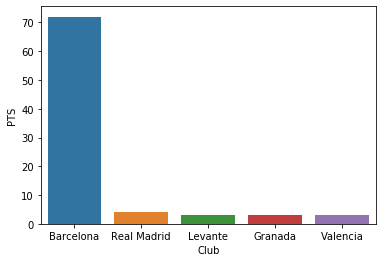

In [394]:
import seaborn as sns
display(df2.sort_values(by='PTS', ascending=False)[:5][['Club', 'PTS']])
sns.barplot(x='Club', y='PTS', data=league_table_df1.sort_values(by='PTS', ascending=False)[:5])

### Bottom 5 teams in La Liga 2019/2020

,Club,PTS
8,Real Betis,0
14,Girona,0
13,Deportivo Alavés,0
12,Leganés,0
11,Real Valladolid,0


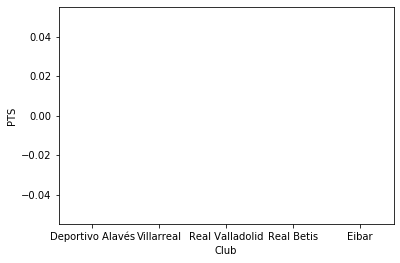

In [399]:
display(df2.sort_values(by='PTS', ascending=True)[:5][['Club', 'PTS']])
sns.barplot(x='Club', y='PTS', data=league_table_df1.sort_values(by='PTS', ascending=True)[:5])

### Top five teams with most number of goals. 2019/2020

,Club,F
0,Barcelona,72
2,Levante,4
6,Atlético Madrid,2
9,Villarreal,2
1,Real Madrid,2


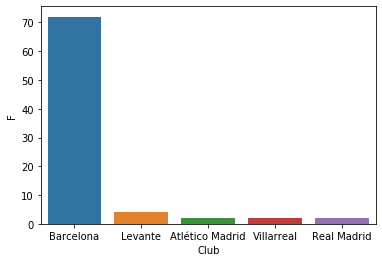

In [400]:
display(df2.sort_values(by='F',ascending=False)[:5][['Club', 'F']])
sns.barplot(x='Club', y='F', data=df2.sort_values(by='F',ascending=False)[:5])

In [401]:
def home_away(df, home_param, away_param):
    home_dict = {}
    away_dict = {}
    for club in clubs2:
        home, away = 0, 0
        home = sum(lliga[lliga['Home_Team'] == club]['Result'] == home_param)
        away = sum(lliga[lliga['Away_Team'] == club]['Result'] == away_param)
        home_dict[club] = home
        away_dict[club] = away
    return (home_dict, away_dict)

In [408]:
home_wins, away_wins = home_away(df=laliga, home_param='Home Won', away_param='Away Won')

In [411]:
print('Top five teams with most number of home wins:')
display(pd.Series(home_wins).sort_values(ascending=False)[:5])

print('\nTop five teams with most number of away wins:')
display(pd.Series(away_wins).sort_values(ascending=False)[:5])

Top five teams with most number of home wins:


Barcelona          14
Valencia            1
Real Madrid         1
Real Sociedad       0
Athletic Bilbao     0
dtype: int64


Top five teams with most number of away wins:


Barcelona     8
Celta Vigo    0
Espanyol      0
Sevilla       0
Valencia      0
dtype: int64

### Logistic Regression for 2019/2020

            home_score  away_score  match_week
home_score    1.000000   -0.237172   -0.365941
away_score   -0.237172    1.000000    0.249531
match_week   -0.365941    0.249531    1.000000
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

    Away Won       1.00      1.00      1.00         4
    Home Won       0.80      1.00      0.89         4

   micro avg       0.89      1.00      0.94         8
   macro avg       0.90      1.00      0.94         8
weighted avg       0.90      1.00      0.94         8

Accuracy: 0.8888888888888888


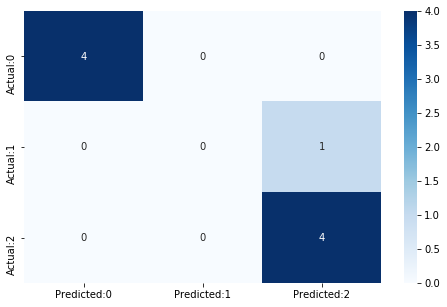

In [412]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
X = laliga[['home_score','away_score','match_week']]
y = laliga['Result']
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(X, y,random_state=1)
model = LogisticRegression(max_iter=1000)
model.fit(x_training_data, y_training_data)
predicted=model.predict(x_test_data)
corr=X.corr()
print(corr)
print(model)
expected = y_test_data
#summarize the fit of the model
print(metrics.classification_report(expected, predicted, labels=np.unique(predicted)))
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(expected,predicted)
conf_matrix1=pd.DataFrame(data=cm1,columns=['Predicted:0','Predicted:1','Predicted:2'],index=['Actual:0','Actual:1','Actual:2'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix1, annot=True,fmt='d',cmap="Blues")
print('Accuracy:',accuracy_score(expected,predicted))

### Event type : Shot 

In [413]:
from tqdm import tqdm
for i, event_id in tqdm(enumerate(old_laliga['match_id'])):
    events = sb.Events(event_id=str(event_id))
    data_ = events.get_dataframe(event_type='shot')
    data = data_ if i == 0 else pd.concat([data, data_])
data = data.reset_index(drop=True)





0it [00:00, ?it/s]



1it [00:06,  6.52s/it]



2it [00:13,  6.52s/it]



3it [00:19,  6.53s/it]



4it [00:23,  5.62s/it]



5it [00:27,  5.41s/it]



6it [00:35,  5.89s/it]



7it [00:37,  4.91s/it]



8it [00:44,  5.61s/it]



9it [00:49,  5.23s/it]



10it [00:51,  4.32s/it]



11it [00:55,  4.16s/it]



12it [00:58,  3.89s/it]



13it [01:00,  3.47s/it]



14it [01:04,  3.54s/it]



15it [01:10,  4.30s/it]



16it [01:15,  4.48s/it]



17it [01:19,  4.17s/it]



18it [01:24,  4.56s/it]



19it [01:27,  4.06s/it]



20it [01:32,  4.47s/it]



21it [01:37,  4.51s/it]



22it [01:43,  5.03s/it]



23it [01:48,  4.95s/it]



24it [01:54,  5.19s/it]



25it [02:02,  6.19s/it]



26it [02:11,  6.95s/it]



27it [02:15,  6.14s/it]



28it [02:20,  5.59s/it]



29it [02:23,  4.85s/it]



30it [02:28,  4.88s/it]



31it [02:30,  4.08s/it]



32it [02:32,  3.59s/it]



33it [02:35,  3.34s/it]



34it [02:39,  4.68s/it]


In [414]:
for i, event_id in tqdm(enumerate(old_laliga1['match_id'])):
    events = sb.Events(event_id=str(event_id))
    data_1 = events.get_dataframe(event_type='shot')
    data1 = data_1 if i == 0 else pd.concat([data1, data_1])
data1 = data1.reset_index(drop=True)





0it [00:00, ?it/s]



1it [00:02,  2.45s/it]



2it [00:06,  3.00s/it]



3it [00:10,  3.09s/it]



4it [00:14,  3.56s/it]



5it [00:21,  4.56s/it]



6it [00:25,  4.47s/it]



7it [00:28,  3.84s/it]



8it [00:31,  3.61s/it]



9it [00:36,  4.13s/it]



10it [00:41,  4.26s/it]



11it [00:47,  4.94s/it]



12it [00:51,  4.47s/it]



13it [00:54,  4.11s/it]



14it [00:57,  3.71s/it]



15it [01:00,  3.52s/it]



16it [01:02,  3.01s/it]



17it [01:04,  2.97s/it]



18it [01:07,  2.99s/it]



19it [01:12,  3.57s/it]



20it [01:15,  3.16s/it]



21it [01:17,  2.93s/it]



22it [01:19,  2.57s/it]



23it [01:21,  2.40s/it]



24it [01:23,  2.30s/it]



25it [01:26,  2.48s/it]



26it [01:28,  2.39s/it]



27it [01:30,  2.38s/it]



28it [01:33,  2.41s/it]



29it [01:35,  2.35s/it]



30it [01:38,  2.46s/it]



31it [01:40,  2.38s/it]



32it [01:42,  2.35s/it]



33it [01:44,  2.31s/it]



34it [01:47,  2.55s/it]



35it [01:49,  2.36s/it]



36it [01:53,  3.14s/it]


In [415]:
for i, event_id in tqdm(enumerate(laliga['match_id'])):
    events = sb.Events(event_id=str(event_id))
    data_2 = events.get_dataframe(event_type='shot')
    data2 = data_2 if i == 0 else pd.concat([data2, data_2])
data2 = data2.reset_index(drop=True)





0it [00:00, ?it/s]



1it [00:02,  2.49s/it]



2it [00:04,  2.48s/it]



3it [00:06,  2.29s/it]



4it [00:08,  2.13s/it]



5it [00:10,  2.05s/it]



6it [00:12,  1.95s/it]



7it [00:13,  1.82s/it]



8it [00:15,  1.77s/it]



9it [00:17,  1.95s/it]



10it [00:20,  2.14s/it]



11it [00:22,  2.21s/it]



12it [00:24,  2.12s/it]



13it [00:28,  2.55s/it]



14it [00:32,  2.98s/it]



15it [00:36,  3.47s/it]



16it [00:39,  3.25s/it]



17it [00:41,  2.99s/it]



18it [00:43,  2.63s/it]



19it [00:45,  2.42s/it]



20it [00:48,  2.66s/it]



21it [00:52,  2.91s/it]



22it [00:55,  3.11s/it]



23it [00:57,  2.79s/it]



24it [00:59,  2.55s/it]



25it [01:01,  2.41s/it]



26it [01:04,  2.34s/it]



27it [01:09,  3.34s/it]



28it [01:13,  3.39s/it]



29it [01:17,  3.50s/it]



30it [01:19,  3.05s/it]



31it [01:21,  2.97s/it]



32it [01:23,  2.72s/it]



33it [01:25,  2.60s/it]


In [416]:
shots = data[data['team']=='Real Madrid'].reset_index(drop=True)
shots1 = data[data['team']=='Barcelona'].reset_index(drop=True)

In [417]:
print('total number of shots:', len(shots))
print('play_pattern -', ((shots['play_pattern'].unique())))
print('type -', (shots['type'].unique()))
print('technique -', (shots['technique'].unique()))
print('outcome -', (shots['outcome'].unique()))

total number of shots: 18
play_pattern - ['From Free Kick' 'From Counter' 'From Throw In' 'From Corner'
 'Regular Play' 'From Goal Kick' 'From Keeper']
type - ['Free Kick' 'Open Play']
technique - ['Normal' 'Half Volley' 'Volley']
outcome - ['Off T' 'Blocked' 'Saved' 'Wayward']


In [418]:
print('total number of shots:', len(shots1))
print('play_pattern -', ((shots1['play_pattern'].unique())))
print('type -', (shots1['type'].unique()))
print('technique -', (shots1['technique'].unique()))
print('outcome -', (shots1['outcome'].unique()))

total number of shots: 521
play_pattern - ['From Free Kick' 'From Goal Kick' 'Regular Play' 'Other' 'From Corner'
 'From Kick Off' 'From Throw In' 'From Keeper' 'From Counter']
type - ['Free Kick' 'Open Play' 'Penalty']
technique - ['Normal' 'Half Volley' 'Volley' 'Overhead Kick' 'Lob' 'Diving Header'
 'Backheel']
outcome - ['Saved' 'Blocked' 'Off T' 'Goal' 'Post' 'Wayward' 'Saved to Post']


In [419]:
shotsR = data1[data1['team']=='Real Madrid'].reset_index(drop=True)
shotsB = data1[data1['team']=='Barcelona'].reset_index(drop=True)


In [420]:
print('total number of shots:', len(shotsR))
print('play_pattern -', ((shotsR['play_pattern'].unique())))
print('type -', (shotsR['type'].unique()))
print('technique -', (shotsR['technique'].unique()))
print('outcome -', (shotsR['outcome'].unique()))

total number of shots: 30
play_pattern - ['Regular Play' 'From Goal Kick' 'From Free Kick' 'From Throw In'
 'From Corner']
type - ['Open Play' 'Free Kick']
technique - ['Normal' 'Volley' 'Half Volley']
outcome - ['Saved' 'Goal' 'Off T' 'Blocked' 'Wayward' 'Post']


In [421]:
print('total number of shots:', len(shotsB))
print('play_pattern -', ((shotsB['play_pattern'].unique())))
print('type -', (shotsB['type'].unique()))
print('technique -', (shotsB['technique'].unique()))
print('outcome -', (shotsB['outcome'].unique()))

total number of shots: 546
play_pattern - ['From Corner' 'From Free Kick' 'From Throw In' 'Regular Play'
 'From Goal Kick' 'From Keeper' 'Other' 'From Counter']
type - ['Open Play' 'Free Kick' 'Penalty']
technique - ['Normal' 'Half Volley' 'Backheel' 'Volley' 'Lob' 'Overhead Kick']
outcome - ['Off T' 'Saved' 'Goal' 'Blocked' 'Wayward' 'Post']


In [422]:
shotsRM = data2[data2['team']=='Real Madrid'].reset_index(drop=True)
shotsBC = data2[data2['team']=='Barcelona'].reset_index(drop=True)

In [423]:
print('total number of shots:', len(shotsRM))
print('play_pattern -', ((shotsRM['play_pattern'].unique())))
print('type -', (shotsRM['type'].unique()))
print('technique -', (shotsRM['technique'].unique()))
print('outcome -', (shotsRM['outcome'].unique()))

total number of shots: 30
play_pattern - ['Regular Play' 'From Throw In' 'From Corner' 'From Counter'
 'From Free Kick']
type - ['Open Play' 'Free Kick']
technique - ['Normal' 'Half Volley' 'Volley']
outcome - ['Saved' 'Blocked' 'Off T' 'Post' 'Wayward' 'Goal']


In [424]:
print('total number of shots:', len(shotsBC))
print('play_pattern -', ((shotsBC['play_pattern'].unique())))
print('type -', (shotsBC['type'].unique()))
print('technique -', (shotsBC['technique'].unique()))
print('outcome -', (shotsBC['outcome'].unique()))

total number of shots: 430
play_pattern - ['From Free Kick' 'From Goal Kick' 'Regular Play' 'From Throw In'
 'From Keeper' 'From Corner' 'From Kick Off' 'From Counter' 'Other']
type - ['Open Play' 'Free Kick' 'Penalty']
technique - ['Normal' 'Half Volley' 'Volley' 'Lob' 'Diving Header' 'Overhead Kick'
 'Backheel']
outcome - ['Post' 'Off T' 'Saved' 'Goal' 'Wayward' 'Blocked' 'Saved Off Target']


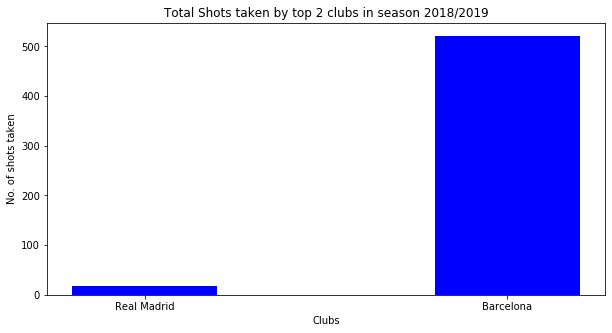

In [428]:
import numpy as np 
import matplotlib.pyplot as plt     
fig = plt.figure(figsize = (10, 5)) 
teams=['Real Madrid', 'Barcelona']
y=[len(shots),len(shots1)]
# creating the bar plot 
plt.bar(teams, y, color ='blue',  
        width = 0.4)  
plt.xlabel("Clubs") 
plt.ylabel("No. of shots taken") 
plt.title("Total Shots taken by top 2 clubs in season 2018/2019") 
plt.show() 

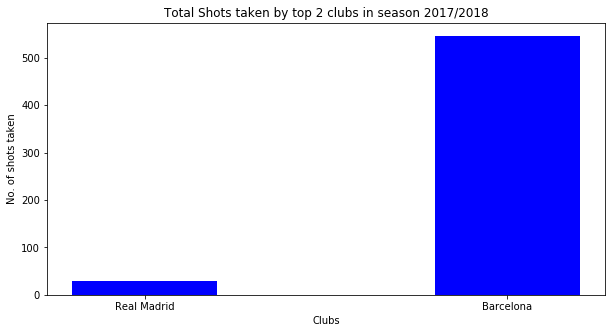

In [429]:
import numpy as np 
import matplotlib.pyplot as plt     
fig = plt.figure(figsize = (10, 5)) 
teams=['Real Madrid', 'Barcelona']
y=[len(shotsR),len(shotsB)]
# creating the bar plot 
plt.bar(teams, y, color ='blue',  
        width = 0.4)  
plt.xlabel("Clubs") 
plt.ylabel("No. of shots taken") 
plt.title("Total Shots taken by top 2 clubs in season 2017/2018") 
plt.show() 

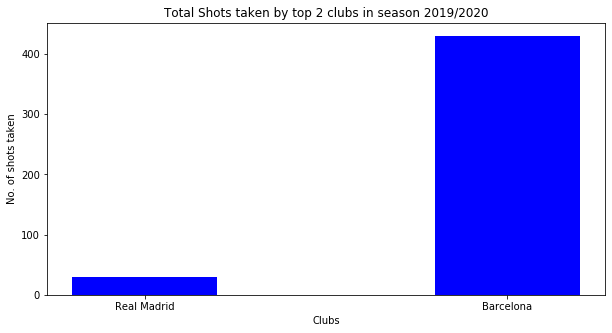

In [430]:
import numpy as np 
import matplotlib.pyplot as plt     
fig = plt.figure(figsize = (10, 5)) 
teams=['Real Madrid', 'Barcelona']
y=[len(shotsRM),len(shotsBC)]
# creating the bar plot 
plt.bar(teams, y, color ='blue',  
        width = 0.4)  
plt.xlabel("Clubs") 
plt.ylabel("No. of shots taken") 
plt.title("Total Shots taken by top 2 clubs in season 2019/2020") 
plt.show() 